- Domain :Education

- Probelm Statement: The edtech company want to increase the conversion rates.The company wants to identify the most    potential leads so that these leads can be converted into potential customers.The data will be used by sales team .The team will communicate with the Hot leads mostly rather than calling all the leads.

- Goal : We have to help the firm in such a way that the conversion rate rises to a minimim level of 80%.Our solution should help the sales associate to directly call the Hot leads as they have high chances of conversion.We will assign Lead scores for the ease of finding out which Lead is to be contacted

In [1]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

data=pd.read_csv("Leads.csv")
data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
#Lets do the basic check first of all

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- The data type for the variables look correct
- There are null values in this dataset which we will deal with
- The leads are mostly gathered from the online portals as and when they give their email id and phone number

In [4]:
# Checking if dataset has any duplicate data

data[data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


- There are no duplicate rows in the dataset

In [5]:
data.shape

(9240, 37)

In [6]:
#Checking if there are any duplicate Prospect ID as it should be unique

len(data["Prospect ID"].unique())

9240

In [7]:
len(data["Lead Number"].unique())

9240

- There are no duplicate values

In [8]:
# Null values
# As leads are gathered from online portal, 'Select' also becomes a null value

data=data.replace("Select",np.nan)

In [9]:
round((data.isnull().sum()/len(data))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Dropping the columns with null values percentage more than 70%

data.drop(["How did you hear about X Education","Lead Profile"],axis=1,inplace=True)

In [11]:
data.shape

(9240, 35)

We will drop Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score columns as they have significant amount of missing values 

In [12]:
data.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1,inplace=True)

In [13]:
#Dropping Lead Quality as it is based on the intuition of the associate .

data.drop(["Lead Quality"],axis=1,inplace=True)

In [14]:
#Dropping the first two columns as it is unique in nature

data.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

#### Treating categorical and numerical columns and handling null values

In [15]:
data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
youtubechannel          1
welearnblog_Home        1
testone                 1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

- This column has a very less amount of null values 
- Google is the main Lead Source
- We will replace null values with 'Google'
- we will replace google with Google

In [16]:
data["Lead Source"]=data["Lead Source"].replace(np.nan,"Google")
data["Lead Source"]=data["Lead Source"].replace("google","Google")

In [17]:
#Grouping the values with less votes together

data["Lead Source"]=data["Lead Source"].replace(['bing','Click2call','Live Chat','Social Media','Press_Release','NC_EDM','youtubechannel','Pay per Click Ads','welearnblog_Home','testone','blog','WeLearn'],'Others')


In [18]:
data["Lead Source"].isnull().sum()

0

In [19]:
# TotalVisits -Replacing null values with median

data["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [20]:
data["TotalVisits"]=data["TotalVisits"].replace(np.nan,data["TotalVisits"].median())

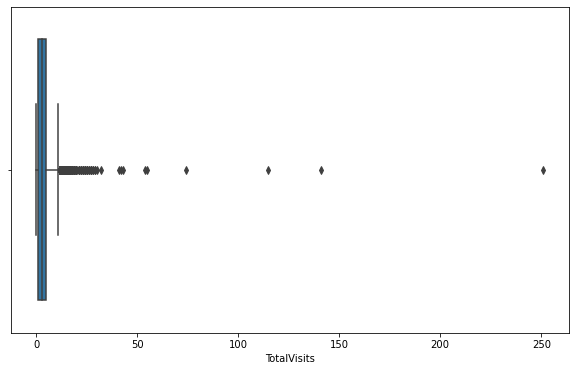

In [21]:
#Looks like there is an outlier , lets check the boxplot

plt.figure(figsize=[10,6])
sns.boxplot(data["TotalVisits"])
plt.show()

In [22]:
# There is an outlier , although this value of outlier is possible , we will still cap it in order to avoid skewness

data["TotalVisits"].describe(percentiles=[0.05,.25,.5,.75,.9,.95,.97,.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
97%        11.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [23]:
quantile99TotalVisits=data["TotalVisits"].quantile(0.99)

data.loc[data["TotalVisits"]>=quantile99TotalVisits,"TotalVisits"]=quantile99TotalVisits

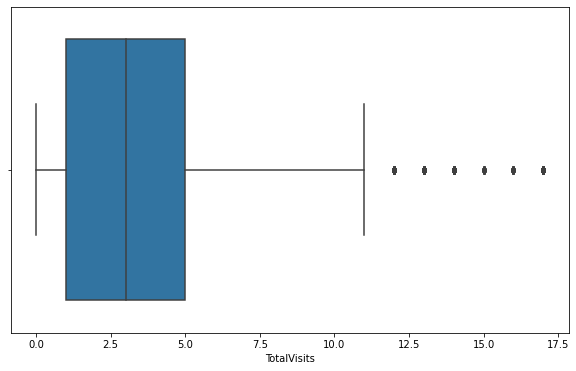

In [24]:
#Check

plt.figure(figsize=[10,6])
sns.boxplot(data["TotalVisits"])
plt.show()

In [25]:
data["TotalVisits"].isnull().sum()

0

In [26]:
# Page Views Per Visit

data["Page Views Per Visit"].describe(percentiles=[0.05,.25,.5,.75,.9,.95,.97,.99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
97%         7.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

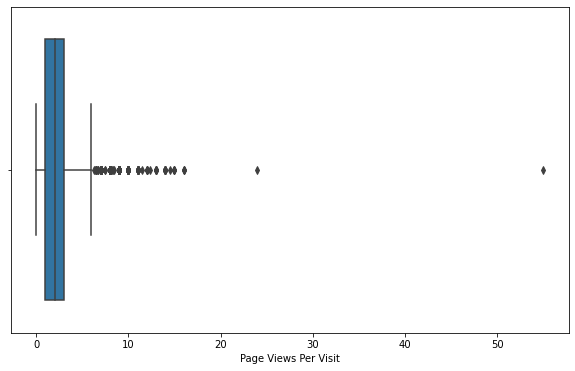

In [27]:
#Check for outlier

plt.figure(figsize=[10,6])
sns.boxplot(data["Page Views Per Visit"])
plt.show()

In [28]:
# There are outliers in the data, replacing null values with median

data["Page Views Per Visit"]=data["Page Views Per Visit"].replace(np.nan,data["Page Views Per Visit"].median())

In [29]:
#Capping the outlier 

quantile99Pageview=data["Page Views Per Visit"].quantile(0.99)

data.loc[data["Page Views Per Visit"]>=quantile99Pageview,"Page Views Per Visit"]=quantile99Pageview

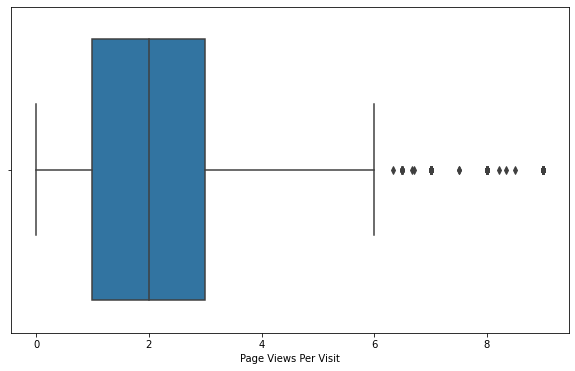

In [30]:
#Check 

plt.figure(figsize=[10,6])
sns.boxplot(data["Page Views Per Visit"])
plt.show()

In [31]:
#Last Activity

data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
#Replacing the values with mode values as the there is very less number of missing values

data["Last Activity"]=data["Last Activity"].replace(np.nan,"Email Opened")

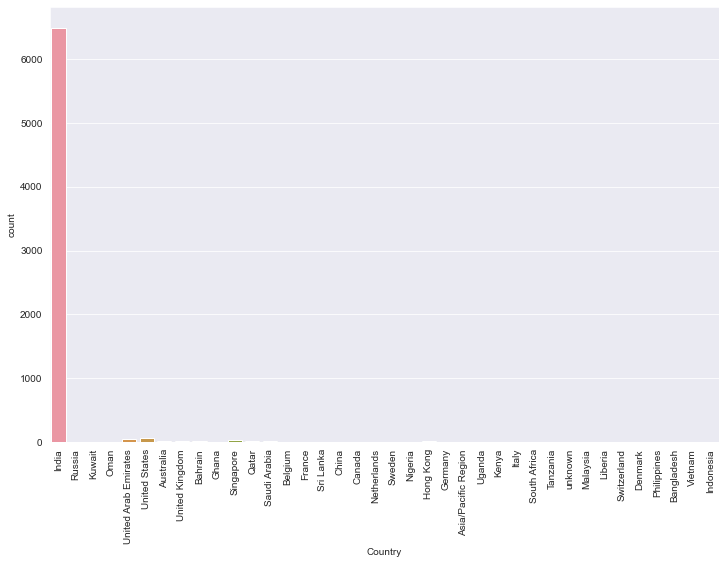

In [33]:
#Country

plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.countplot(data.Country)
plt.xticks(rotation=90)
plt.show()

- Most of the data points are from India

In [34]:
# We will replace the values with India

data.Country=data.Country.replace(np.nan, "India")

In [35]:
data.Country.isnull().sum()

0

<AxesSubplot:>

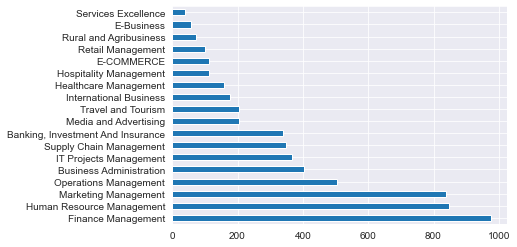

In [36]:
# Specialization

# This is one of the important column, as it is an education related portal

data.Specialization.value_counts().plot.barh()

In [37]:
# The column has considerable amount of null values, replacing with mode won't help
# We will make a seperate column, "Others"

data.Specialization=data.Specialization.replace(np.nan,"Others")

In [38]:
# Replacing column name for ease 

data=data.rename({"What is your current occupation":"Occupation"},axis=1)

<AxesSubplot:>

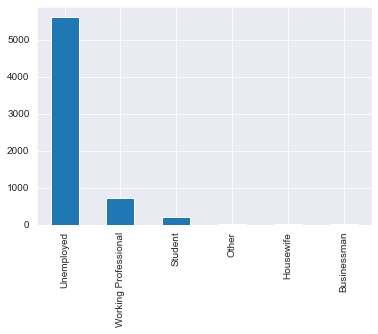

In [39]:
data.Occupation.value_counts().plot.bar()

In [40]:
# The column has considerable amount of null values, replacing with mode won't help
# We will make a seperate column, "Unknown"

data.Occupation=data.Occupation.replace(np.nan,"Unknown")

In [41]:
#What matters most to you in choosing a course

data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- As we can see everyone is looking for Better Career Prospects .
- We can drop the column as it is quite evident that everyone is aiming for the same goal.

<AxesSubplot:>

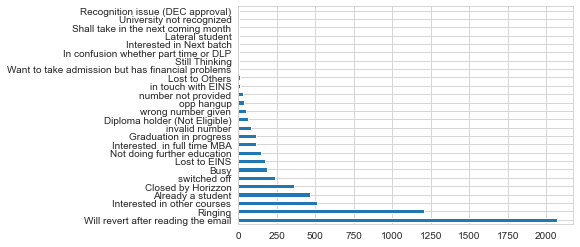

In [42]:
#Tags

sns.set_style("whitegrid")
data.Tags.value_counts().plot.barh()

- We will drop this column as it doesn't covert much information and hence not handling the null values

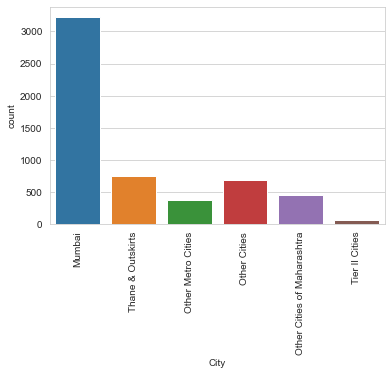

In [43]:
# City 

sns.axes_style("darkgrid")
sns.countplot(data.City)
plt.xticks(rotation=90)
plt.show()

- The data is for Indian Cities
- Majority of leads are from Tier 1 and Tier 2 cities
- Not replacing the null values as it will create bias 
- Column wont be used for further analysis 

In [44]:
data.drop(["Tags","What matters most to you in choosing a course","City"],axis=1,inplace=True)

In [45]:
data.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
Occupation                                  0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

# Exploratory Data Analysis

In [46]:
#Lets check if data is balanced or not

data["Converted"].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

<AxesSubplot:>

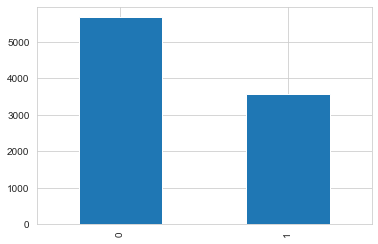

In [47]:
data["Converted"].value_counts().plot.bar()

- The data is not imbalanced 
- 0 means the lead was not converted whereas 1 means lead was converted

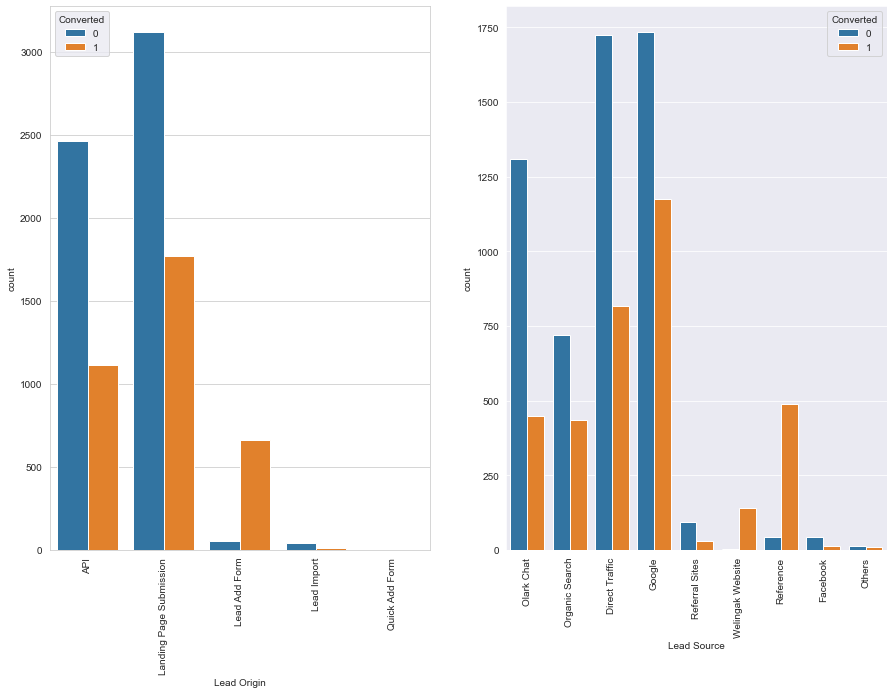

In [48]:
# Lead Source and Lead Origin

plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
sns.set_style("darkgrid")
sns.countplot(data["Lead Origin"],hue="Converted",data=data)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.set_style("darkgrid")
sns.countplot(data["Lead Source"],hue="Converted",data=data)
plt.xticks(rotation=90)
plt.show()


- The customer was identified as a lead mostly with Landing Page submission as origin identifier followed by API and Lead Add form
- Amongst all, Google acted as the best Lead source followed by Direct Traffic, Reference
- Olark Chart, Organic Search also look like decent lead sources
- Referrals should be awarded in order to get more lead conversion.They act as a good lead source as they will be referring their friends and also share their experience with the edtech company and the course they are enrolled in
#### The company can focus on strategies including the above mentioned sources and origins


<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

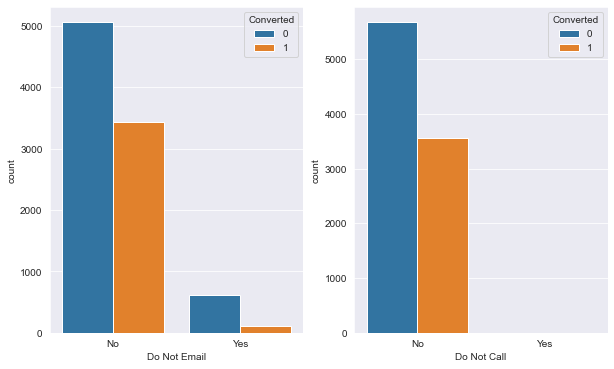

In [49]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(data["Do Not Email"],hue='Converted',data=data)

plt.subplot(1,2,2)
sns.countplot(data["Do Not Call"],hue='Converted',data=data)

- People are ok with the mail and the calls
- People who are ok with mail and call have high conversion rates as compared to people who are not.
- The sales team can target people who are good with a sale associate calling and mailing them. The mails and calls should be highly interactive and customer focused and not some random spam


<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

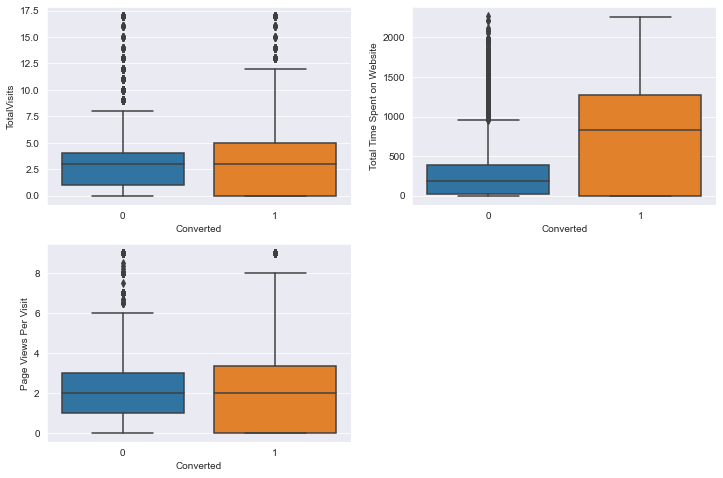

In [50]:
# Analysing the numerical columns

numeric_vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

plt.figure(figsize=[12,8])

plt.subplot(2,2,1)
sns.boxplot(y=data["TotalVisits"],x="Converted",data=data)

plt.subplot(2,2,2)
sns.boxplot(y=data["Total Time Spent on Website"],x="Converted",data=data)

plt.subplot(2,2,3)
sns.boxplot(y=data["Page Views Per Visit"],x="Converted",data=data)

- People who spent more time on website have high chances of conversion.Company can decide a particular threshold for the time limit after which the sales associate can try to contact them
- In general people who visit the pages, spend time on a particular page means that they are reading the content and looking at what the course has to offer
- If this variables are combined with other variables (eg:Reference) , there are chances of lead conversion 

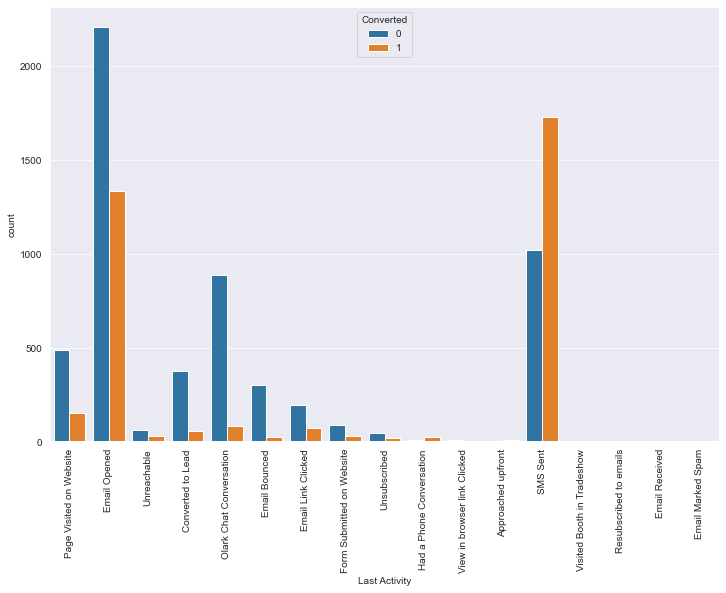

In [51]:
# Last Activity 

plt.figure(figsize=[12,8])
sns.set_style("darkgrid")
sns.countplot(data["Last Activity"],hue="Converted",data=data)
plt.xticks(rotation=90)
plt.show()

- People who have SMS sent and Email opened as their Last activities have high chances of conversion

In [52]:
data['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [53]:
# Last Activity column has some variables which can be grouped together

data['Last Activity']=data['Last Activity'].replace(['Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

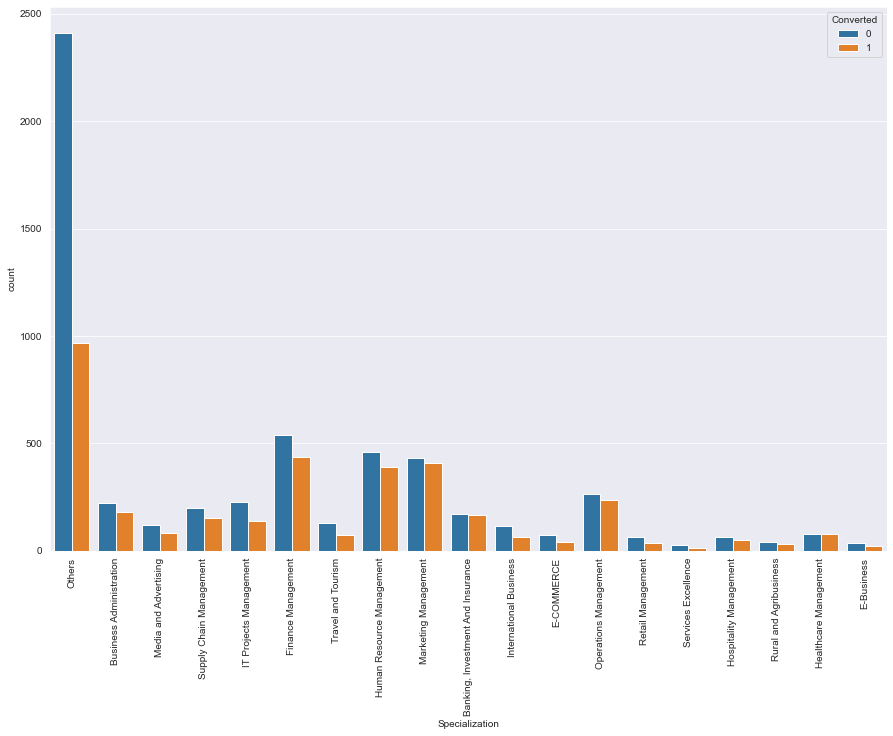

In [54]:
#Plot for specialization

plt.figure(figsize=[15,10])
sns.countplot(data["Specialization"],hue="Converted",data=data)
plt.xticks(rotation=90)
plt.show()

- As majority of data is marked as Others(Unknown), it is difficult to find the exact specialisation.The team should mark this dropdown as mandatory and also remove the default value as 'Select'
- The company can focus on leads who opt for specialisation which have high conversion rates .Eg: Management Programs  

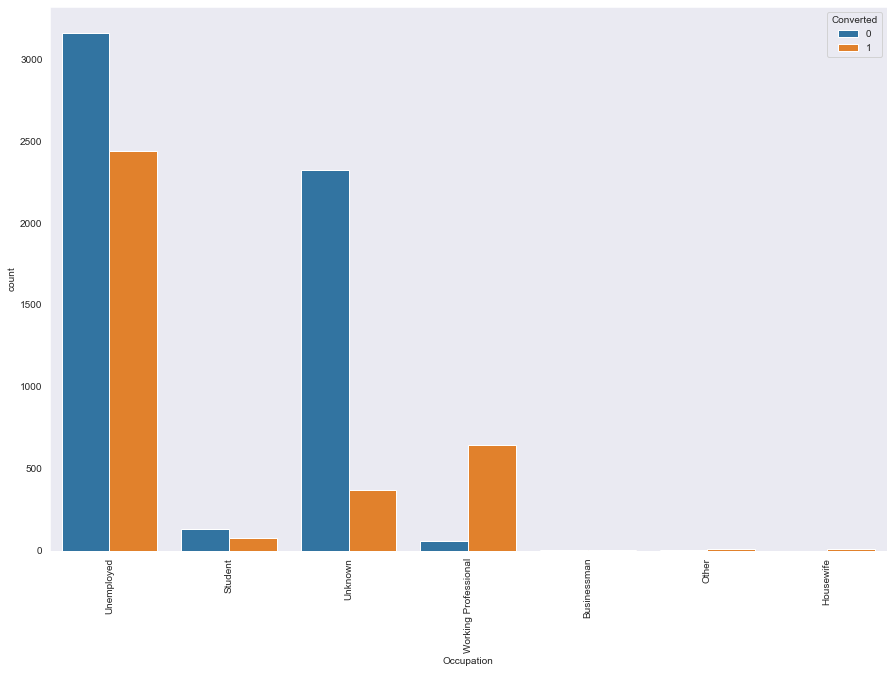

In [55]:
# Occupation

plt.figure(figsize=[15,10])
sns.set_style("dark")
sns.countplot(data["Occupation"],hue="Converted",data=data)
plt.xticks(rotation=90)
plt.show()

- Customers who are unemployed can be freshers,students and might be looking for better opportunities .
- Working professionals might be looking for transition or specialisation in a domain.
- Company can add some fields like fresher, work gap ,etc instead of unemployed to get more information about the person


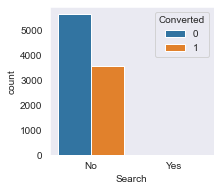

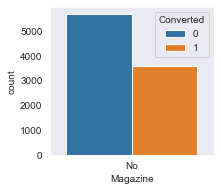

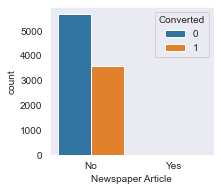

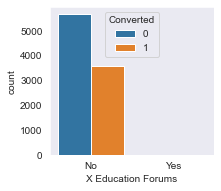

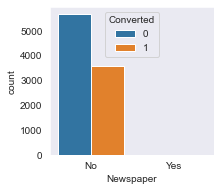

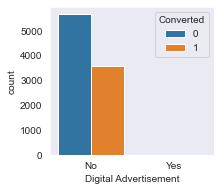

In [56]:
#Advertisement

types=['Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement']
count=1
for i in types:
    plt.figure(figsize=[10,6])
    plt.subplot(2,3,count)
    sns.countplot(data["{}".format(i)],hue="Converted",data=data)
    count=count+1

- The above plots tell that , even if the customer hasn't seen any add , there are still lead conversions.The company can only focus on few modes of advertisement such as Digital Advertisement and use digital marketing only to show ads to people who have visited their website

In [57]:
data["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [58]:
data["Receive More Updates About Our Courses"].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

- Both Through Recommendations and Receive More Updates About Our Courses columns have No as their maximum values

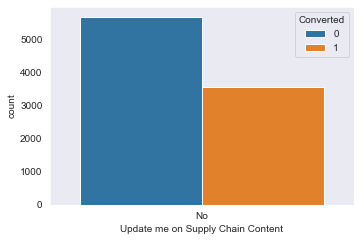

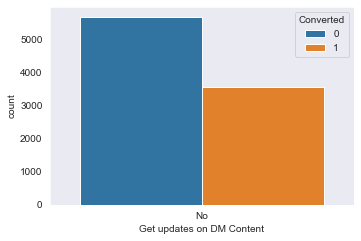

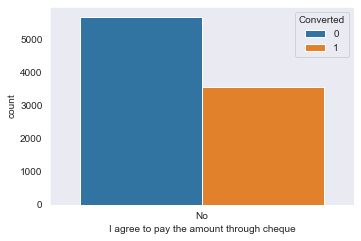

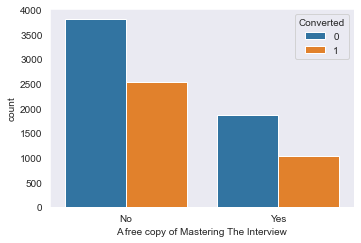

In [59]:
# Rest of the variables

variables=['Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
count=1
for i in variables:
    plt.figure(figsize=[12,8])
    plt.subplot(2,2,count)
    sns.countplot(data["{}".format(i)],hue="Converted",data=data)
    count+=1

- As we can see all the answers are no for the first three columns
- The company can still give the copy of mastering the interview, so that they find few customers from it.If the customers like the product they will revert back

#### From the above plots we saw that many categorical columns have the same values entirely which will not help us in finding out if a lead can be converted. We will drop these columns

In [60]:
data.drop(['Do Not Call','Country', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1,inplace=True)

In [61]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


<Figure size 1080x720 with 0 Axes>

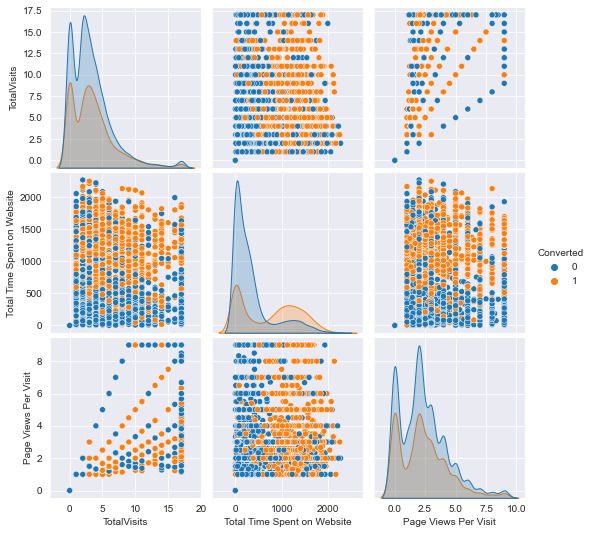

In [62]:
# Plotting Pairplots for numeric columns

plt.figure(figsize=[15,10])
sns.set_style("darkgrid")
sns.pairplot(data,hue="Converted",data=data)
plt.show()

- We cannot see a strong correlation as such
- Even the boxplots which we plotted individually for the numeric variables conveyed the same information as pairplot

In [63]:
#Converted datapoints 

data_Converted=data[(data.Converted==1)]
data_Converted.groupby("Lead Origin")["Lead Source"].value_counts()

Lead Origin              Lead Source     
API                      Olark Chat          447
                         Google              434
                         Organic Search      176
                         Direct Traffic       39
                         Referral Sites       18
                         Others                1
Landing Page Submission  Direct Traffic      779
                         Google              713
                         Organic Search      260
                         Referral Sites       13
                         Others                3
Lead Add Form            Reference           490
                         Welingak Website    140
                         Google               28
                         Others                5
                         Olark Chat            1
Lead Import              Facebook             13
Quick Add Form           Google                1
Name: Lead Source, dtype: int64

- By using the above combination , the team can increase the chances of lead conversion

In [64]:
# Finding out the combination
dataframe=data_Converted.groupby("Occupation")["Specialization"].value_counts()

In [65]:
Df=pd.DataFrame(dataframe)

In [66]:
Df=Df.rename(columns={"Specialization":"Count"})

In [67]:
Df.sort_values(by="Count",ascending=False).head(30)

Count
Occupation           Specialization                          
Unemployed           Others                               792
                     Finance Management                   278
                     Marketing Management                 261
                     Human Resource Management            250
Unknown              Others                               152
Unemployed           Operations Management                134
                     Business Administration              111
                     Banking, Investment And Insurance    111
Working Professional Marketing Management                 105
                     Finance Management                   103
Unemployed           Supply Chain Management               97
                     IT Projects Management                94
Working Professional Human Resource Management             88
                     Operations Management                 79
Unemployed           Media and Advertising                 57
                     Travel and Tourism                    50
                     International Business                46
Working Professional Business Administration               46
                     Supply Chain Management               42
Unemployed           Healthcare Management                 42
Unknown              Finance Management                    36
                     Human Resource Management             35
Working Professional Banking, Investment And Insurance     34
                     IT Projects Management                34
Unknown              Marketing Management                  30
Unemployed           Hospitality Management                26
                     E-COMMERCE                            25
                     Retail Management                     24
Working Professional Healthcare Management                 23
Unknown              Operations Management                 22

- Team can look at the above combination.
- As said earlier , the dropdown for Specialisation and Occupation can be modified in order to get more data
- Finance Management , Marketing Management are the generally opted courses


#### Data Preparation and Preprocessing

In [68]:
# Converting Yes and No to 1 and 0

def function(x):
    
    if x=="Yes":
        return 1
    elif x=="No":
        return 0

data["Do Not Email"]=data["Do Not Email"].apply(function)

In [69]:
# We will use dummy variables for rest of the categorical columns

dummies=pd.get_dummies(data[["Lead Origin","Lead Source","Last Activity","Specialization","Occupation"]], drop_first=True )


In [70]:
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
print(dummies.shape)
print("\n")
print(data.shape)

(9240, 47)


(9240, 10)


In [72]:
# Merging the data frames

mergeddata=pd.concat([data,dummies],axis=1)

In [73]:
mergeddata.shape

(9240, 57)

In [74]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   int64  
 3   Converted                                 9240 non-null   int64  
 4   TotalVisits                               9240 non-null   float64
 5   Total Time Spent on Website               9240 non-null   int64  
 6   Page Views Per Visit                      9240 non-null   float64
 7   Last Activity                             9240 non-null   object 
 8   Specialization                            9240 non-null   object 
 9   Occupation                                9240 non-null   object 
 10  Lead Origin_Landing Page Submission 

In [75]:
# Dropping columns for which we got dummies

mergeddata.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Occupation"],axis=1,inplace=True)

In [76]:
mergeddata.shape

(9240, 52)

- Data is now cleaned, the outliers are treated, dummy variables are created, also we found drew some insights from the plots 

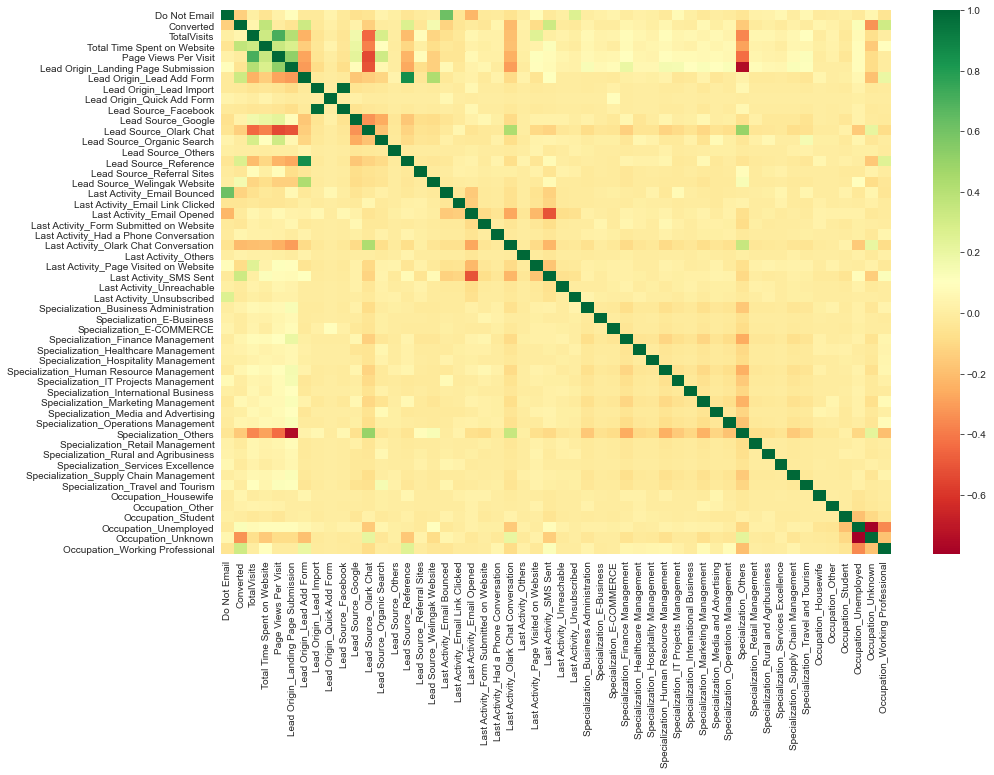

In [77]:
# Heat Map

plt.figure(figsize=(15,10))
sns.heatmap(mergeddata.corr(),cmap="RdYlGn")
plt.show()

- Lead Source_Facebook and Lead Origin_Lead import are correlated
- Lead Source_Reference and Lead Origin_Lead Add Form are correlated
- Total Visits and Page View Per Visit are correlated
- Last Activity_Email bounced and Do not email are correlated

- Specialization Others and Lead Origin Landing Page Submission are negatively correlated
- Occupation unemployed and Occupation Unknown are negatively correlated

## Model building

#### Since , we have to find out whether a customer/lead was converted or not , it will be a logistic regression problem.The firm wants us to give score ranging from 0 to 100

In [78]:
from sklearn.model_selection import train_test_split

X=mergeddata.drop("Converted",axis=1)
y=mergeddata["Converted"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=100)

print(X_train.shape)
print(X_test.shape)

(6468, 51)
(2772, 51)


#### Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

numeric_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[numeric_vars]=scaler.fit_transform(X_train[numeric_vars])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
1871,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0,0.205373,0.005716,-0.503379,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3516,0,0.512365,-0.691418,0.092260,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,0,0.512365,1.365219,1.364995,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3934,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Feature Selection using RFE

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on W

In [82]:
col = X_train.columns[rfe.support_]

In [83]:
#columns removed
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
  

### Model 1

In [84]:
len(col)

20

In [85]:
X_train=X_train[col]

import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train)

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model1=logm1.fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.7
Date:                Tue, 07 Sep 2021   Deviance:                       5201.4
Time:                        18:40:38   Pearson chi2:                 8.81e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7964      0.150     -5.297      0.000      -1.091      -0.502
Do Not Email                              -1.1775      0.182     -6.471      0.000      -1.534      -0.821
Total Time Spent on Website                1.0646      0.040     26.624      0.000       0.986       1.143
Lead Origin_Landing Page Submission       -1.0430      0.129     -8.056      0.000      -1.297      -0.789
Lead Origin_Lead Add Form                  2.7701      0.204     13.573      0.000       2.370       3.170
Lead Source_Facebook                      -0.6617      0.523     -1.266      0.205      -1.686       0.363
Lead Source_Olark Chat                     1.0831      0.124      8.744      0.000       0.840       1.326
Lead Source_Welingak Website               2.4789      0.750      3.306      0.001       1.009       3.949
Last Activity_Email Opened                 0.7377      0.110      6.687      0.000       0.521       0.954
Last Activity_Had a Phone Conversation     2.7329      0.687      3.979      0.000       1.387       4.079
Last Activity_Olark Chat Conversation     -0.5997      0.192     -3.129      0.002      -0.975      -0.224
Last Activity_Others                       1.7401      0.679      2.561      0.010       0.408       3.072
Last Activity_SMS Sent                     1.8834      0.112     16.859      0.000       1.664       2.102
Last Activity_Unreachable                  0.8666      0.368      2.352      0.019       0.144       1.589
Last Activity_Unsubscribed                 1.3789      0.484      2.851      0.004       0.431       2.327
Specialization_Hospitality Management     -0.9697      0.328     -2.953      0.003      -1.613      -0.326
Specialization_Others                     -0.9666      0.124     -7.799      0.000      -1.210      -0.724
Specialization_Rural and Agribusiness      0.5367      0.390      1.377      0.168      -0.227       1.301
Occupation_Housewife                      22.7691   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                        -1.0783      0.088    -12.304      0.000      -1.250      -0.907
Occupation_Working Professional            2.4123      0.190     12.690      0.000       2.040       2.785
==========================================================================================================
"""

In [86]:
#Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
15,Specialization_Others,2.78
7,Last Activity_Email Opened,2.58
11,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
18,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


- As we can see Occupation Housewife has the highest P value.We will first drop columns with High p values

### Model 2

In [87]:
X_train=X_train.drop('Occupation_Housewife',axis=1)

#Model 2

X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model2=logm2.fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.3
Date:                Tue, 07 Sep 2021   Deviance:                       5214.5
Time:                        18:40:38   Pearson chi2:                 8.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7870      0.150     -5.244      0.000      -1.081      -0.493
Do Not Email                              -1.1833      0.182     -6.505      0.000      -1.540      -0.827
Total Time Spent on Website                1.0635      0.040     26.628      0.000       0.985       1.142
Lead Origin_Landing Page Submission       -1.0385      0.129     -8.027      0.000      -1.292      -0.785
Lead Origin_Lead Add Form                  2.7865      0.204     13.668      0.000       2.387       3.186
Lead Source_Facebook                      -0.6630      0.522     -1.269      0.204      -1.687       0.361
Lead Source_Olark Chat                     1.0824      0.124      8.742      0.000       0.840       1.325
Lead Source_Welingak Website               2.4618      0.750      3.283      0.001       0.992       3.931
Last Activity_Email Opened                 0.7355      0.110      6.690      0.000       0.520       0.951
Last Activity_Had a Phone Conversation     2.7217      0.687      3.964      0.000       1.376       4.067
Last Activity_Olark Chat Conversation     -0.6049      0.192     -3.159      0.002      -0.980      -0.230
Last Activity_Others                       1.7319      0.680      2.548      0.011       0.400       3.064
Last Activity_SMS Sent                     1.8734      0.111     16.817      0.000       1.655       2.092
Last Activity_Unreachable                  0.8555      0.368      2.322      0.020       0.133       1.578
Last Activity_Unsubscribed                 1.3747      0.484      2.842      0.004       0.426       2.323
Specialization_Hospitality Management     -0.9768      0.328     -2.975      0.003      -1.620      -0.333
Specialization_Others                     -0.9706      0.124     -7.836      0.000      -1.213      -0.728
Specialization_Rural and Agribusiness      0.5284      0.390      1.357      0.175      -0.235       1.292
Occupation_Unknown                        -1.0822      0.088    -12.357      0.000      -1.254      -0.911
Occupation_Working Professional            2.4036      0.190     12.650      0.000       2.031       2.776
==========================================================================================================
"""

In [88]:
#Using VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
15,Specialization_Others,2.78
7,Last Activity_Email Opened,2.58
11,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
17,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


- Dropping lead source facebook as it has high p value

### Model 3

In [89]:
X_train=X_train.drop('Lead Source_Facebook',axis=1)

#Model 3

X_train_sm = sm.add_constant(X_train)

logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model3=logm3.fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.1
Date:                Tue, 07 Sep 2021   Deviance:                       5216.3
Time:                        18:40:39   Pearson chi2:                 8.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8031      0.149     -5.372      0.000      -1.096      -0.510
Do Not Email                              -1.1835      0.182     -6.504      0.000      -1.540      -0.827
Total Time Spent on Website                1.0662      0.040     26.722      0.000       0.988       1.144
Lead Origin_Landing Page Submission       -1.0200      0.128     -7.945      0.000      -1.272      -0.768
Lead Origin_Lead Add Form                  2.8074      0.203     13.812      0.000       2.409       3.206
Lead Source_Olark Chat                     1.1013      0.123      8.949      0.000       0.860       1.342
Lead Source_Welingak Website               2.4598      0.750      3.281      0.001       0.990       3.929
Last Activity_Email Opened                 0.7299      0.110      6.641      0.000       0.514       0.945
Last Activity_Had a Phone Conversation     2.7236      0.686      3.968      0.000       1.378       4.069
Last Activity_Olark Chat Conversation     -0.6044      0.192     -3.156      0.002      -0.980      -0.229
Last Activity_Others                       1.7306      0.681      2.543      0.011       0.397       3.064
Last Activity_SMS Sent                     1.8703      0.111     16.789      0.000       1.652       2.089
Last Activity_Unreachable                  0.8565      0.369      2.324      0.020       0.134       1.579
Last Activity_Unsubscribed                 1.3745      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management     -0.9883      0.327     -3.018      0.003      -1.630      -0.346
Specialization_Others                     -0.9676      0.124     -7.828      0.000      -1.210      -0.725
Specialization_Rural and Agribusiness      0.5300      0.390      1.360      0.174      -0.234       1.294
Occupation_Unknown                        -1.0814      0.088    -12.345      0.000      -1.253      -0.910
Occupation_Working Professional            2.4023      0.190     12.647      0.000       2.030       2.775
==========================================================================================================
"""

In [90]:
#Using VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.98
14,Specialization_Others,2.77
6,Last Activity_Email Opened,2.55
10,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
8,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
16,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


- Dropping Specialization_Rural and Agribusiness as it has high p value

### Model 4

In [91]:
X_train=X_train.drop('Specialization_Rural and Agribusiness',axis=1)

#Model 4

X_train_sm = sm.add_constant(X_train)

logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model4=logm4.fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.1
Date:                Tue, 07 Sep 2021   Deviance:                       5218.1
Time:                        18:40:39   Pearson chi2:                 8.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7946      0.149     -5.323      0.000      -1.087      -0.502
Do Not Email                              -1.1816      0.182     -6.501      0.000      -1.538      -0.825
Total Time Spent on Website                1.0658      0.040     26.717      0.000       0.988       1.144
Lead Origin_Landing Page Submission       -1.0201      0.128     -7.949      0.000      -1.272      -0.769
Lead Origin_Lead Add Form                  2.8060      0.203     13.808      0.000       2.408       3.204
Lead Source_Olark Chat                     1.1027      0.123      8.963      0.000       0.862       1.344
Lead Source_Welingak Website               2.4603      0.750      3.282      0.001       0.991       3.930
Last Activity_Email Opened                 0.7286      0.110      6.634      0.000       0.513       0.944
Last Activity_Had a Phone Conversation     2.7159      0.686      3.958      0.000       1.371       4.061
Last Activity_Olark Chat Conversation     -0.6084      0.191     -3.177      0.001      -0.984      -0.233
Last Activity_Others                       1.7254      0.681      2.535      0.011       0.391       3.060
Last Activity_SMS Sent                     1.8672      0.111     16.779      0.000       1.649       2.085
Last Activity_Unreachable                  0.8494      0.369      2.305      0.021       0.127       1.572
Last Activity_Unsubscribed                 1.3908      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management     -0.9946      0.327     -3.038      0.002      -1.636      -0.353
Specialization_Others                     -0.9746      0.123     -7.895      0.000      -1.217      -0.733
Occupation_Unknown                        -1.0824      0.088    -12.360      0.000      -1.254      -0.911
Occupation_Working Professional            2.4011      0.190     12.642      0.000       2.029       2.773
==========================================================================================================
"""

In [92]:
#Using VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.97
14,Specialization_Others,2.77
6,Last Activity_Email Opened,2.55
10,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
8,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
15,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


- The p values are significant and VIF is below 5.We will now predict the values

In [93]:
# We will now predict the values using the train dataset and then compare it with the actual y_train values

y_train_pred=model4.predict(X_train_sm)

In [94]:
y_train_pred

1871    0.523275
6795    0.113589
3516    0.337442
8105    0.818689
3934    0.292883
          ...   
350     0.857712
79      0.989827
8039    0.292883
6936    0.091607
5640    0.123053
Length: 6468, dtype: float64

In [95]:
y_train_pred=y_train_pred.values.reshape(-1)

In [96]:
#Creating Dataframe

y_train_pred_final = pd.DataFrame({'Converted_act':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

,Converted_act,Converted_Prob,Prospect_ID
0,0,0.523275,1871
1,0,0.113589,6795
2,0,0.337442,3516
3,0,0.818689,8105
4,0,0.292883,3934


In [97]:
# As it is based on probability , we need to find optimal cut off value
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,Converted_act,Converted_Prob,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.523275,1871,1,1,1,1,1,1,0,0,0,0
1,0,0.113589,6795,1,1,0,0,0,0,0,0,0,0
2,0,0.337442,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.818689,8105,1,1,1,1,1,1,1,1,1,0
4,0,0.292883,3934,1,1,1,0,0,0,0,0,0,0
5,1,0.988331,4844,1,1,1,1,1,1,1,1,1,1
6,0,0.134244,3297,1,1,0,0,0,0,0,0,0,0
7,1,0.998941,8071,1,1,1,1,1,1,1,1,1,1
8,0,0.099226,987,1,0,0,0,0,0,0,0,0,0
9,1,0.900465,7423,1,1,1,1,1,1,1,1,1,1


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
from sklearn import metrics
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

## We want to predict the lead who can be tagged as hot leads.Only these hot leads will be contacted as they will have high 
## chances of conversion 
## We want our model to have good accuracy along with good sensitivity(=True postive rate=recall)

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_act, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.632653  0.973236  0.422789
0.2   0.2  0.763760  0.916058  0.669915
0.3   0.3  0.800247  0.847932  0.770865
0.4   0.4  0.818027  0.775345  0.844328
0.5   0.5  0.819264  0.710057  0.886557
0.6   0.6  0.803958  0.613544  0.921289
0.7   0.7  0.785405  0.525547  0.945527
0.8   0.8  0.763760  0.430251  0.969265
0.9   0.9  0.713822  0.267234  0.989005


<Figure size 1080x720 with 0 Axes>

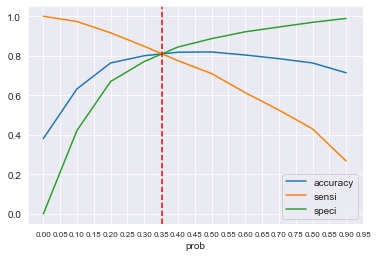

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(15,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.353, color='r', linestyle='--')
plt.show()

- The intersection point was found out by plotting the line with different values ranging between 0.35 and 0.36
- The values 0.353 looks like an optimal value

In [100]:
#Choosing 0.353 as the optimal value

y_train_pred_final=y_train_pred_final.iloc[:,0:3]
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.353 else 0)
y_train_pred_final.head()

,Converted_act,Converted_Prob,Prospect_ID,final_predicted
0,0,0.523275,1871,1
1,0,0.113589,6795,0
2,0,0.337442,3516,0
3,0,0.818689,8105,1
4,0,0.292883,3934,0


In [101]:
# The company wants the Lead Score. We will multiply the probabilities by 100

y_train_pred_final['lead_score']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_act,Converted_Prob,Prospect_ID,final_predicted,lead_score
1229,0,0.999485,8057,1,99
3115,1,0.999476,2656,1,99
4891,1,0.999467,8074,1,99
6312,1,0.999106,3428,1,99
7,1,0.998941,8071,1,99
...,...,...,...,...,...
2016,0,0.004591,976,0,0
4946,0,0.004441,3300,0,0
3282,0,0.004103,5381,0,0
1457,0,0.003624,5279,0,0


In [102]:
# Confusion Matrix

#                      Predicted not converted  Predicted converted
# Actual not converted        TN                      FP
# Actual Converted            FN                      TP

confusion = metrics.confusion_matrix(y_train_pred_final.Converted_act, y_train_pred_final.final_predicted)
print(confusion)

[[3259  743]
 [ 483 1983]]


In [103]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score

print(metrics.accuracy_score(y_train_pred_final.Converted_act, y_train_pred_final.final_predicted))

0.8104514533085961


In [104]:
speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])

print("Model Sensitivity is:",sensi)
print('\n')
print("Model Specificity is:",speci)

Model Sensitivity is: 0.8041362530413625


Model Specificity is: 0.8143428285857072


In [105]:
# Calculating Precision and recall

from sklearn.metrics import precision_score, recall_score
print("Precision is:",precision_score(y_train_pred_final.Converted_act, y_train_pred_final.final_predicted))
print("\n")
print("Recall is:",recall_score(y_train_pred_final.Converted_act, y_train_pred_final.final_predicted))

Precision is: 0.727439471753485


Recall is: 0.8041362530413625


In [106]:
# Precision vs Recall curve

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_act, y_train_pred_final.Converted_Prob)


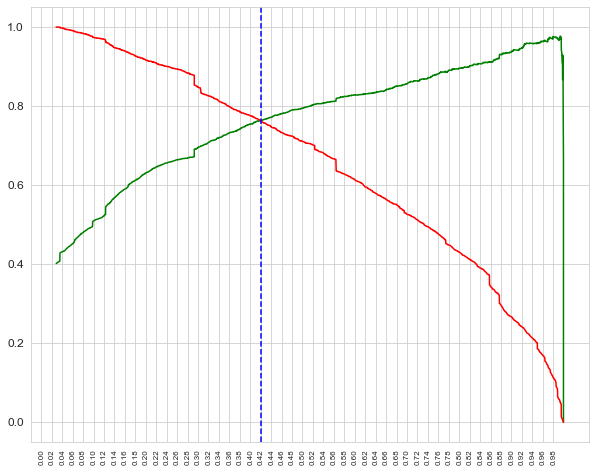

In [107]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.42, color='b', linestyle='--') 
plt.xticks(np.arange(0,1,step=0.02),size=8,rotation=90)
plt.yticks(size=12)

plt.show()

In [108]:
#Choosing 0.42 as the optimal value based on precision recall 

y_train_pred_final['final_predicted_pre_rec'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted_act,Converted_Prob,Prospect_ID,final_predicted,lead_score,final_predicted_pre_rec
0,0,0.523275,1871,1,52,1
1,0,0.113589,6795,0,11,0
2,0,0.337442,3516,0,33,0
3,0,0.818689,8105,1,81,1
4,0,0.292883,3934,0,29,0


In [109]:
# Confusion Matrix

#                      Predicted not converted  Predicted converted
# Actual not converted        TN                      FP
# Actual Converted            FN                      TP

confusion = metrics.confusion_matrix(y_train_pred_final.Converted_act, y_train_pred_final.final_predicted_pre_rec)
print(confusion)

[[3420  582]
 [ 585 1881]]


In [110]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score

print(metrics.accuracy_score(y_train_pred_final.Converted_act, y_train_pred_final.final_predicted_pre_rec))

0.8195732838589982


In [111]:
speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])

print("Model Sensitivity is:",sensi)
print('\n')
print("Model Specificity is:",speci)

Model Sensitivity is: 0.7627737226277372


Model Specificity is: 0.8545727136431784


- As we can see , the cutoff which we got from Precsion Recall curve decreased the sensitivity .We will reject this cutoff as we need high sensitvity and hence take the value of cutoff as 0.353

In [112]:
# Classification Report : Precision, Recall and F1 Score

from sklearn.metrics import classification_report
print( metrics.classification_report( y_train_pred_final['Converted_act'], y_train_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4002
           1       0.73      0.80      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.82      0.81      0.81      6468



- We got an accuracy of = 81%
- Sensitivity of the model is =80% which means that the model is able to predict the ones who have chances of conversion

#### ROC curve

In [113]:
from sklearn import metrics 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
## Plotting the ROC curve

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_act'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

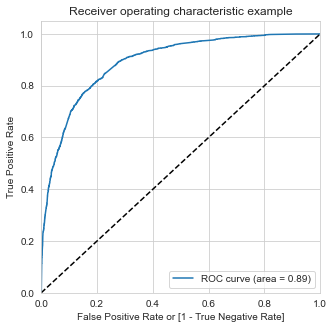

In [115]:
draw_roc(y_train_pred_final['Converted_act'], y_train_pred_final['Converted_Prob'])

- The model is good as the curve is closer to left hand border

#### Prediction on test set

In [116]:
#Scaling the numeric variables

X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
4269,0,1.433341,0.964504,2.892276,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2376,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7766,0,0.512365,-0.777416,1.364995,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
9199,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4359,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
len(X_train.columns)

17

In [118]:
X_test=X_test[X_train.columns]

In [119]:
len(X_test.columns)

17

In [120]:
X_test_sm=sm.add_constant(X_test)

In [121]:
y_test_pred = model4.predict(X_test_sm)

In [122]:
# Creating a dataframe

y_test_pred=y_test_pred.values.reshape(-1)

y_test_pred_final = pd.DataFrame({'Converted_act':y_test.values, 'Converted_Prob':y_test_pred})

y_test_pred_final.head()

,Converted_act,Converted_Prob
0,1,0.510886
1,1,0.876578
2,1,0.835810
3,0,0.098109
4,1,0.857712


In [123]:
y_test_pred_final["Prospect_ID"]=y_test.index

In [124]:
y_test_pred_final.head()

,Converted_act,Converted_Prob,Prospect_ID
0,1,0.510886,4269
1,1,0.876578,2376
2,1,0.835810,7766
3,0,0.098109,9199
4,1,0.857712,4359


In [125]:
# Using the optimal cutoff point

y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.353 else 0)
y_test_pred_final.head()

,Converted_act,Converted_Prob,Prospect_ID,final_predicted
0,1,0.510886,4269,1
1,1,0.876578,2376,1
2,1,0.835810,7766,1
3,0,0.098109,9199,0
4,1,0.857712,4359,1


In [126]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_test_pred_final.Converted_act, y_test_pred_final.final_predicted)
print(confusion)

[[1368  309]
 [ 211  884]]


In [127]:
print("Accuracy is:",metrics.accuracy_score(y_test_pred_final.Converted_act, y_test_pred_final.final_predicted))


Accuracy is: 0.8124098124098124


In [128]:
speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])

print("Model Sensitivity is:",sensi)
print('\n')
print("Model Specificity is:",speci)

Model Sensitivity is: 0.8073059360730593


Model Specificity is: 0.815742397137746


In [129]:
# Adding the lead score

y_test_pred_final['lead_score']=(y_test_pred_final['Converted_Prob']*100).astype("int64")
y_test_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_act,Converted_Prob,Prospect_ID,final_predicted,lead_score
546,1,0.999440,3478,1,99
2405,1,0.998992,5921,1,99
1026,1,0.998738,5671,1,99
745,1,0.998438,6383,1,99
931,0,0.998382,8054,1,99
...,...,...,...,...,...
17,0,0.006346,3545,0,0
2034,0,0.003638,2454,0,0
2521,0,0.003432,8733,0,0
597,0,0.002870,3682,0,0


In [130]:
# Classification Report : Precision, Recall and F1 Score

from sklearn.metrics import classification_report
print( metrics.classification_report( y_test_pred_final['Converted_act'], y_test_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1677
           1       0.74      0.81      0.77      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.81      2772
weighted avg       0.82      0.81      0.81      2772



- All the parameters look good
- The model is predicting the values with good accuracy and sensitivity

In [131]:
# Final Parmaeters

parameters=model4.params[1:]
parameters

Do Not Email                             -1.181616
Total Time Spent on Website               1.065766
Lead Origin_Landing Page Submission      -1.020124
Lead Origin_Lead Add Form                 2.805987
Lead Source_Olark Chat                    1.102740
Lead Source_Welingak Website              2.460273
Last Activity_Email Opened                0.728596
Last Activity_Had a Phone Conversation    2.715903
Last Activity_Olark Chat Conversation    -0.608401
Last Activity_Others                      1.725433
Last Activity_SMS Sent                    1.867184
Last Activity_Unreachable                 0.849359
Last Activity_Unsubscribed                1.390826
Specialization_Hospitality Management    -0.994600
Specialization_Others                    -0.974588
Occupation_Unknown                       -1.082411
Occupation_Working Professional           2.401134
dtype: float64

In [132]:
# Finding top features:

variabledf=pd.DataFrame(parameters)
variabledf=variabledf.rename(columns={0:"Coefficient"})
variabledf.sort_values(by="Coefficient",ascending=False)


,Coefficient
Lead Origin_Lead Add Form,2.805987
Last Activity_Had a Phone Conversation,2.715903
Lead Source_Welingak Website,2.460273
Occupation_Working Professional,2.401134
Last Activity_SMS Sent,1.867184
Last Activity_Others,1.725433
Last Activity_Unsubscribed,1.390826
Lead Source_Olark Chat,1.102740
Total Time Spent on Website,1.065766
Last Activity_Unreachable,0.849359


- The above represent the values of the coefficients.
- With a unit change in the independent variable the target variables will change with a value equal to the coefficent of respective variable when all the other variables are held constant

In [133]:
variabledf["Top predictors"]=round(variabledf["Coefficient"]/max(variabledf["Coefficient"])*100,2)
variabledf.sort_values(by="Top predictors",ascending=False)


,Coefficient,Top predictors
Lead Origin_Lead Add Form,2.805987,100.00
Last Activity_Had a Phone Conversation,2.715903,96.79
Lead Source_Welingak Website,2.460273,87.68
Occupation_Working Professional,2.401134,85.57
Last Activity_SMS Sent,1.867184,66.54
Last Activity_Others,1.725433,61.49
Last Activity_Unsubscribed,1.390826,49.57
Lead Source_Olark Chat,1.102740,39.30
Total Time Spent on Website,1.065766,37.98
Last Activity_Unreachable,0.849359,30.27


- Multiplying the coefficient magnitude with the respective variables and adding the constant will give us the equation 
- p= 1/1+e^(-z) , z will be the value which you will get after substituting the values of the variables and then multiplyting it with respective coefficient and adding the constant
- p will be the probability of conversion.Higher value will indicate hot leads